In [66]:
!cat /new_data/TBX11K/README.md

Paper title: Rethinking Computer-Aided Tuberculosis Diagnosis
Authors: Yun Liu, Yu-Huan Wu, Yunfeng Ban, Huifang Wang, Ming-Ming Cheng


This TBX11K dataset contains 11200 X-ray images with corresponding bounding box annotations for tuberculosis (TB) areas. All images are with a size of 512x512. There are five categories in this dataset, i.e., Healthy, Sick but Non-TB, Active TB, Latent TB, and Uncertain TB. We split this dataset into training, validation, and testing sets, consisting of 6600, 1800, and 2800 X-ray images, respectively. We provide the image lists of the training, validation, and training+validation sets, namely 'TBX11K_train.txt', 'TBX11K_val.txt', and 'TBX11K_trainval.txt', respectively.


Since TB data are very expensive in practice, we take the data from four small TB datasets here to make full use of the existing data. These four datasets are DA, DB, Montgomery, and Shenzhen X-ray datasets, consisting of 156, 150, 138, and 662 X-ray images, respectively. We view a p

In [121]:
import json
import pandas as pd
from pathlib import Path
df = "/datasets/chest-14/Data_Entry_2017.csv"


In [122]:
df = pd.read_csv(df)

In [123]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168


In [99]:
df[df[0].str.contains("px\d")].shape

(22, 1)

In [104]:
target_maping = {
        "health": 0,
        "tb": 1,
        "sick": 1
    }


In [108]:
df["Target"] = df[0].str.split("/").str.get(0)

In [120]:
for key, target in target_maping.items():
    df[df["Target"] == key]["T

In [119]:
df[df["Target"] == 0]

,0,a,Target
600,health/h0001.png,health,0
601,health/h0003.png,health,0
602,health/h0005.png,health,0
603,health/h0008.png,health,0
604,health/h0009.png,health,0
...,...,...,...
3595,health/h4991.png,health,0
3596,health/h4992.png,health,0
3597,health/h4994.png,health,0
3598,health/h4999.png,health,0


In [85]:

from utils.visualisation import showInRow
from transforms.finetuning import ChestTransforms
import numpy as np
from pathlib import Path

In [36]:
dataset = RSNADataset(dataset_dir="/datasets/rsna/stage_2_train_images", 
                      csv_data="/datasets/rsna/stage_2_train_labels.csv",
                      transform=ChestTransforms(height=320))

30227
30227


torch.Size([3, 320, 320])


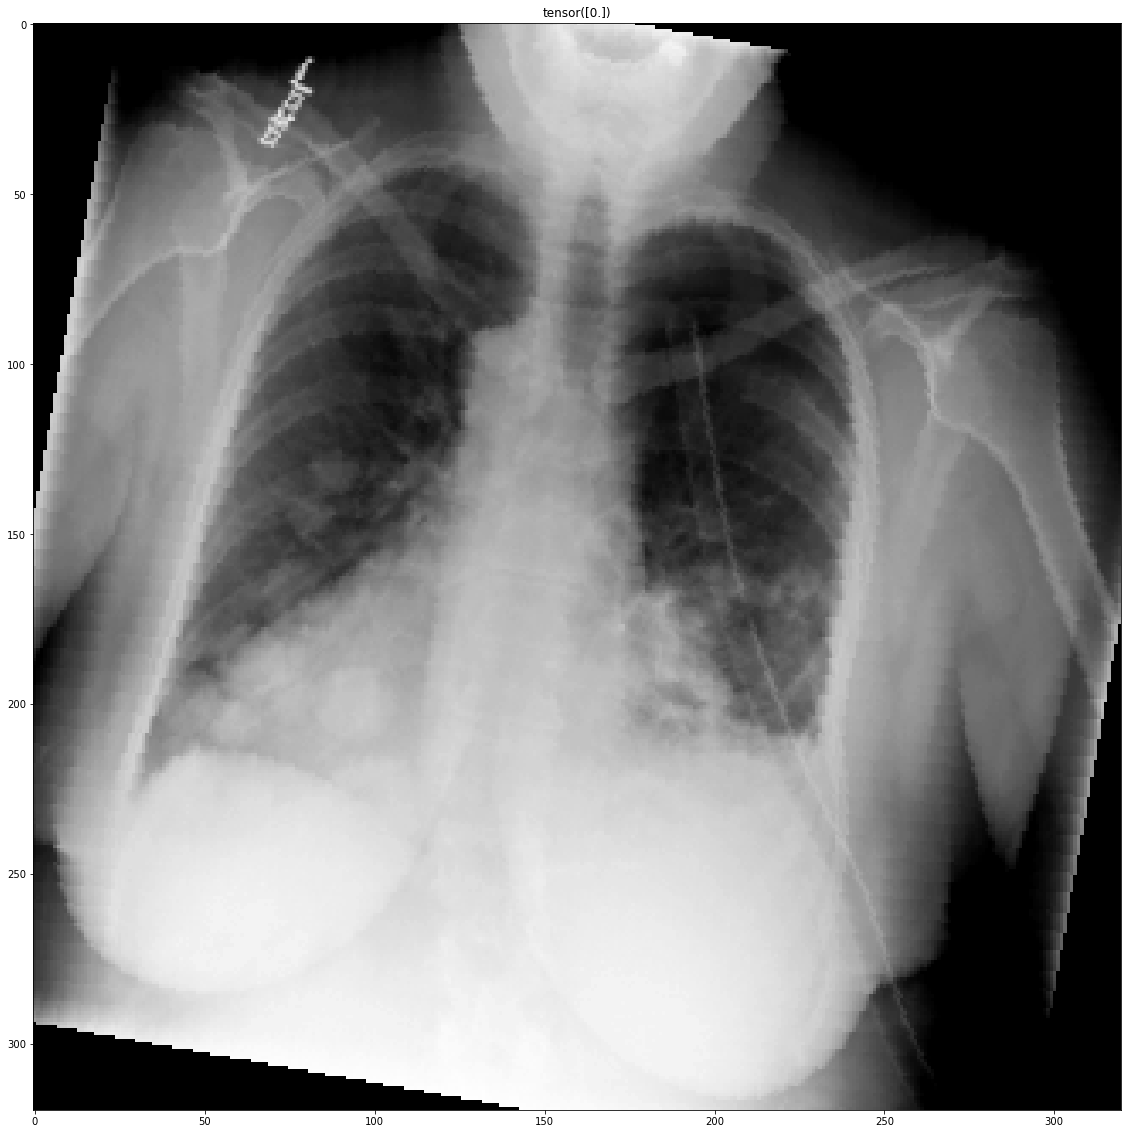

In [37]:
sample = dataset[0]
showInRow([sample["image"]], [sample["target"]], tensor=True)

In [6]:
super(RSNADataset)

<super: data_loaders.rsna_loader.RSNADataset, None>

In [4]:
sample["image"]

tensor([[[149.],
         [133.],
         [118.],
         ...,
         [183.],
         [191.],
         [121.]],

        [[130.],
         [113.],
         [ 98.],
         ...,
         [177.],
         [185.],
         [115.]],

        [[108.],
         [ 92.],
         [ 78.],
         ...,
         [172.],
         [182.],
         [112.]],

        ...,

        [[ 16.],
         [ 14.],
         [ 11.],
         ...,
         [ 19.],
         [ 15.],
         [  3.]],

        [[ 18.],
         [ 16.],
         [ 12.],
         ...,
         [ 21.],
         [ 17.],
         [  5.]],

        [[ 19.],
         [ 17.],
         [ 13.],
         ...,
         [ 23.],
         [ 19.],
         [  6.]]])

In [17]:
import PIL

In [18]:
img = PIL.Image.open("/datasets/chest-14/images/00000001_000.png")

In [19]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [8]:
a = np.array([[[1],[2]],[[3],[4]]]).astype(np.uint8)
np.dstack([a,a,a])

array([[[1, 1, 1],
        [2, 2, 2]],

       [[3, 3, 3],
        [4, 4, 4]]], dtype=uint8)

In [9]:
from torchvision import transforms

In [10]:
a = transforms.ToPILImage()(a)

In [14]:
a = transforms.ToTensor()(a)

In [15]:
a.shape

torch.Size([1, 2, 2])

In [20]:
transforms.ToTensor()(img)

tensor([[[0.7922, 0.7804, 0.7647,  ..., 0.0196, 0.0078, 0.0000],
         [0.7804, 0.7686, 0.7647,  ..., 0.0196, 0.0078, 0.0000],
         [0.7686, 0.7608, 0.7569,  ..., 0.0196, 0.0078, 0.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 1.0000, 0.9961,  ..., 0.0000, 0.0000, 0.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000]]])

In [89]:
from data_loaders.datasets.base_dataset import BaseDataset
from data_loaders.datasets.chexpert_dataset import CheXpertDataset
from transforms.finetuning import ChestTransforms
from utils.visualisation import showInRow

In [91]:
d = CheXpertDataset("/datasets/chest-14/", "datasets/chest-14.csv", transform=ChestTransforms(height=320))

TypeError: __init__() takes 1 positional argument but 3 were given

In [86]:
s = d[1]

torch.Size([3, 320, 320])


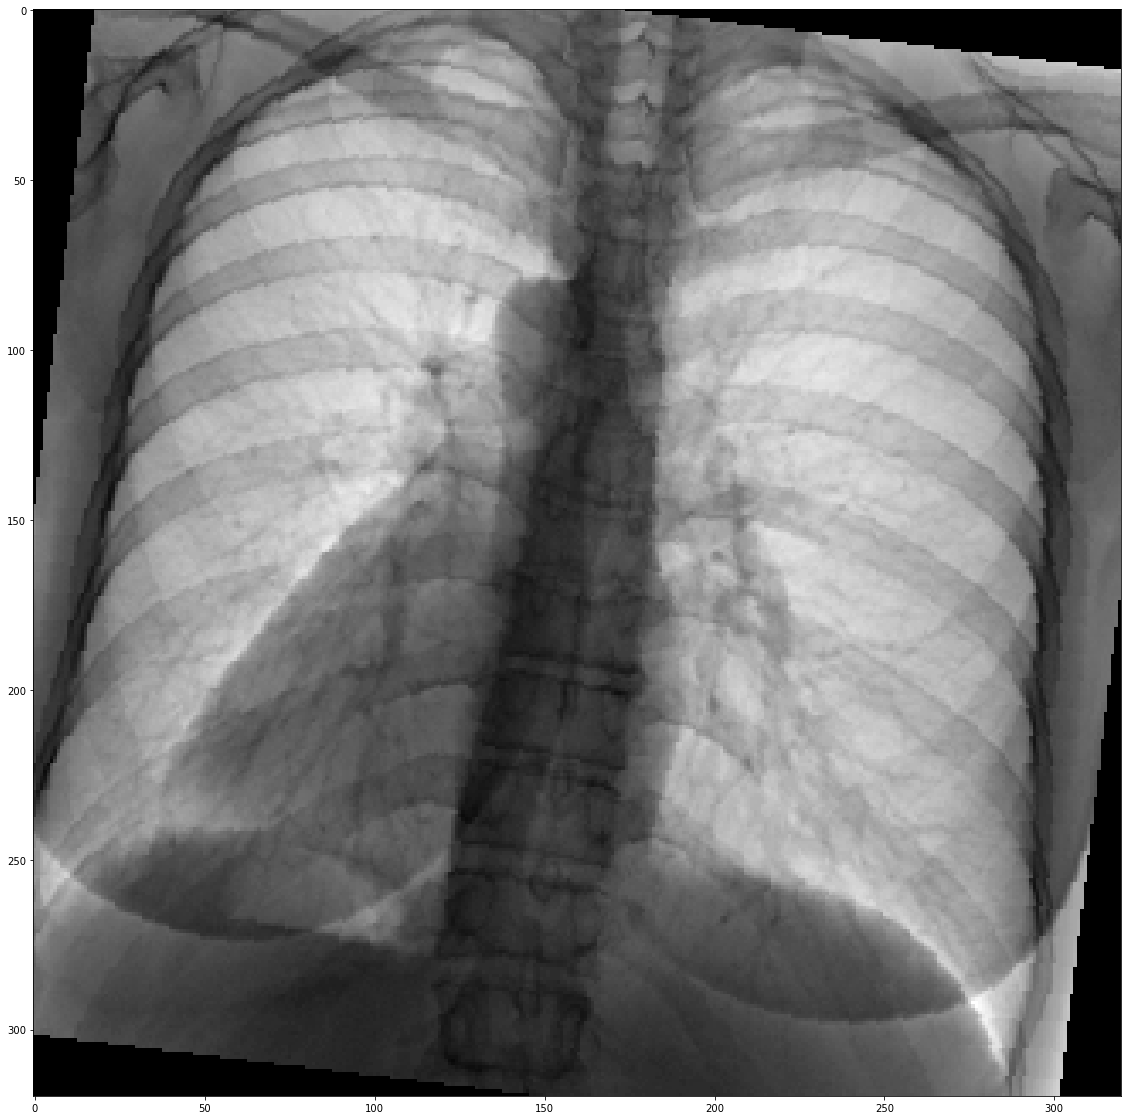

In [87]:
showInRow([s["image"]], tensor=True)

<class 'pathlib.PosixPath'>
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])torch.Size([3, 256, 256])

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


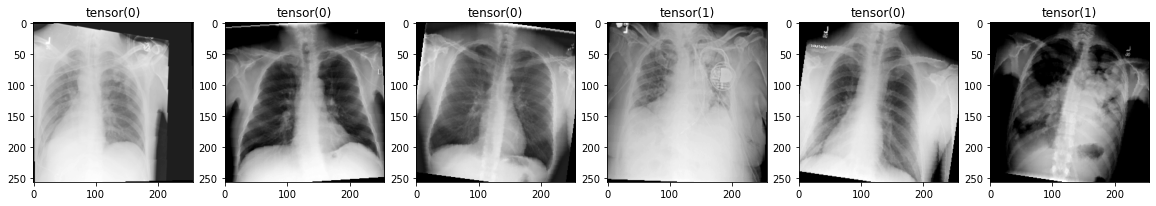

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


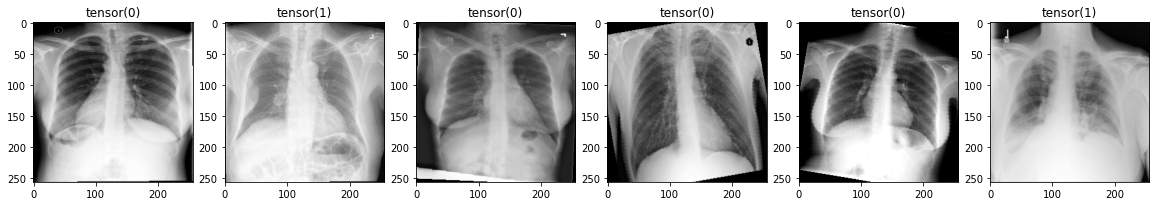

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


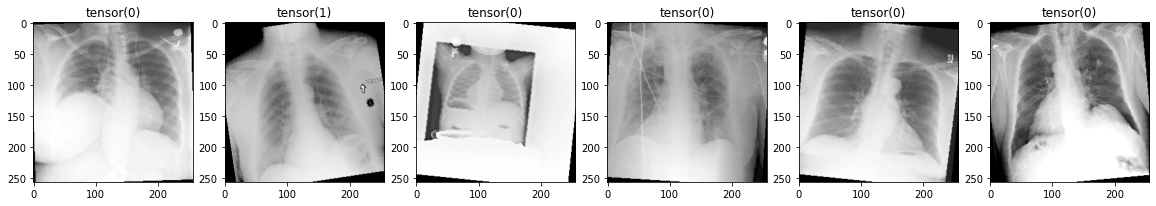

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


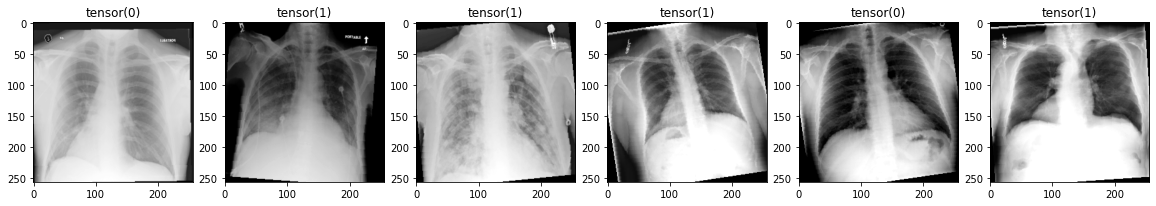

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


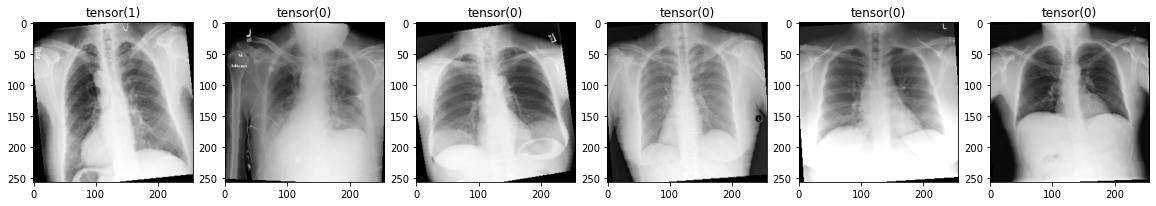

In [26]:
data_module = get_data_module("Chest14", 
                              transform=ChestTransforms(height=256), 
                              batch_size=6,
                              seed=12345)
batches = 4
for batch in data_module.train_dataloader():
    img1, labels = batch["image"],batch['label']
    showInRow(img1, labels, tensor=True)
    batches -=  1
    if batches<0:
        break

In [72]:
i = Path("/datasets/chest-xray-pneumonia/train/NORMAL/")

In [77]:
filenames = [str(p) for p in i.glob("*.jpeg")]

In [79]:
df = pd.DataFrame(filenames,columns=["Path"])


In [1]:
from data_loaders.csv_processors.rsna_csv_processor import create_pmeumonia_csv

In [2]:
df = create_pmeumonia_csv("/datasets/chest-xray-pneumonia")

In [5]:
df[df["Phase"] == "train"]

,Path,Target,Phase
0,/datasets/chest-xray-pneumonia/train/NORMAL/NO...,0,train
1,/datasets/chest-xray-pneumonia/train/NORMAL/NO...,0,train
2,/datasets/chest-xray-pneumonia/train/NORMAL/IM...,0,train
3,/datasets/chest-xray-pneumonia/train/NORMAL/IM...,0,train
4,/datasets/chest-xray-pneumonia/train/NORMAL/IM...,0,train
...,...,...,...
3870,/datasets/chest-xray-pneumonia/train/PNEUMONIA...,1,train
3871,/datasets/chest-xray-pneumonia/train/PNEUMONIA...,1,train
3872,/datasets/chest-xray-pneumonia/train/PNEUMONIA...,1,train
3873,/datasets/chest-xray-pneumonia/train/PNEUMONIA...,1,train


In [4]:
df = pd.read_csv("/datasets/chest-14/train_val_list.txt", header=None)
df.columns = ["Path"]

In [6]:
df2 = pd.read_csv("/datasets/chest-14/Data_Entry_2017.csv")

In [9]:
df2[df2["Image Index"] in df["Path"].values]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


ValueError: Lengths must match to compare

In [14]:
len(df["Path"].values)

86524

In [16]:
train_val = df2[df2["Image Index"].isin(df["Path"].values)]

In [18]:
from sklearn.model_selection import train_test_split

In [ ]:
train, val = train_test_split(train_val, test_size=0.2, stratify)

In [33]:
df.to_csv

,patientId,x,y,width,height,Target,Path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,/datasets/0004cfab-14fd-4e49-80ba-63a80b6bddd6...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,/datasets/00313ee0-9eaa-42f4-b0ab-c148ed3241cd...
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,/datasets/00322d4d-1c29-4943-afc9-b6754be640eb...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,/datasets/003d8fa0-6bf1-40ed-b54c-ac657f8495c5...
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,/datasets/00436515-870c-4b36-a041-de91049b9ab4...
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,/datasets/c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8...
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,/datasets/c1edf42b-5958-47ff-a1e7-4f23d99583ba...
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,/datasets/c1f6b555-2eb1-4231-98f6-50a963976431...
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,/datasets/c1f7889a-9ea9-4acb-b64c-b737c929599a...


In [34]:
from data_loaders import base_data_module

In [35]:
base_data_module

<module 'data_loaders.base_data_module' from '/home/intern/SSL_Chest_Xray/data_loaders/base_data_module.py'>

In [38]:
import cv2

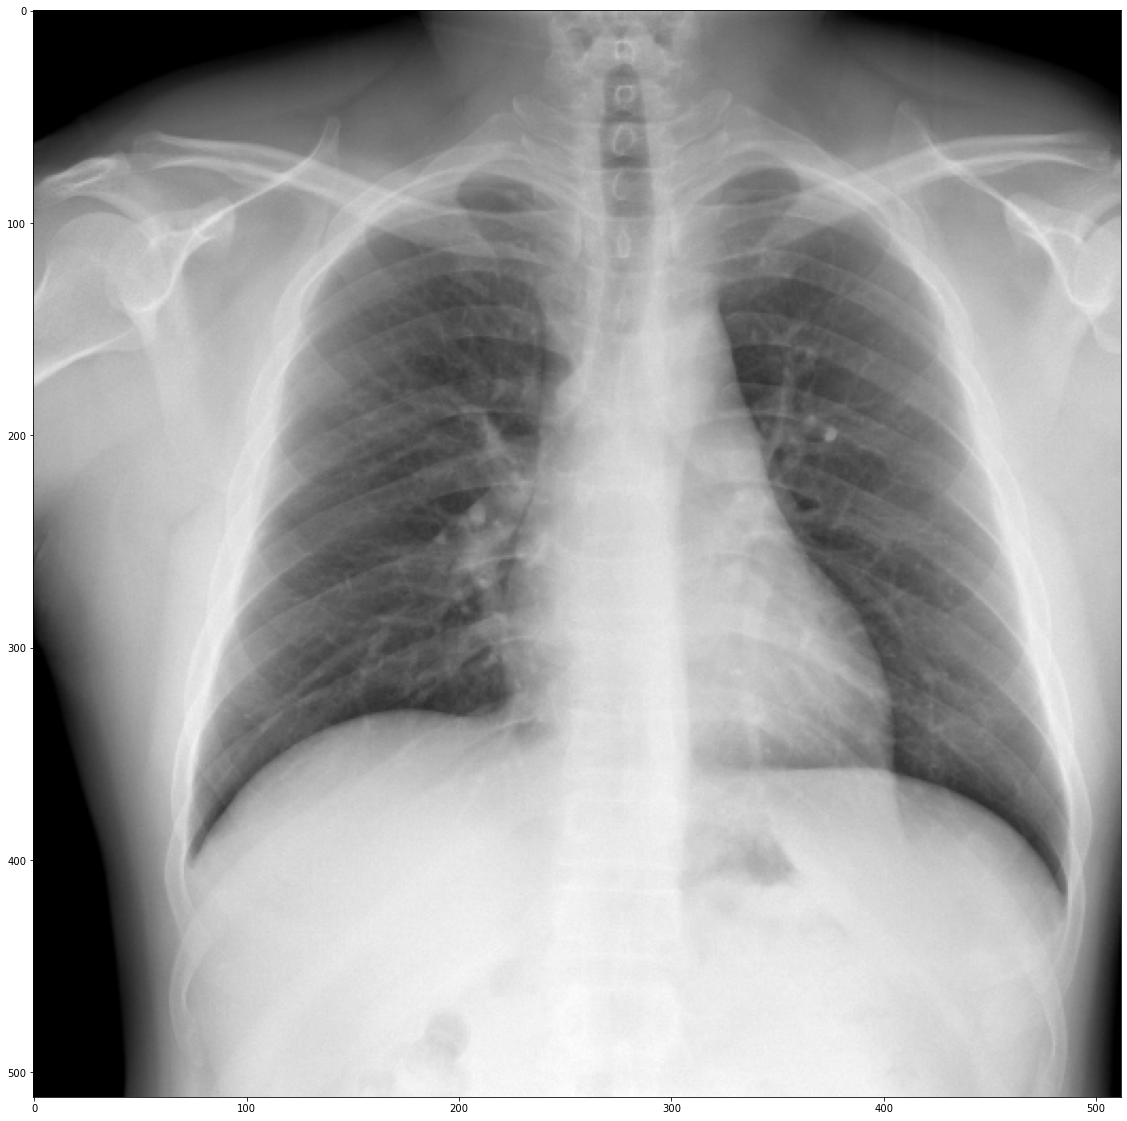

In [47]:
showInRow([cv2.imread("/new_data/TBX11K/imgs/health/h0003.png")])